In [2]:
import pandas as pd

#Load Dataset
data = pd.read_csv(r"C:\Users\tejap\PDS_Assignment_3&4\Question-2\RawData\diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 2) a)

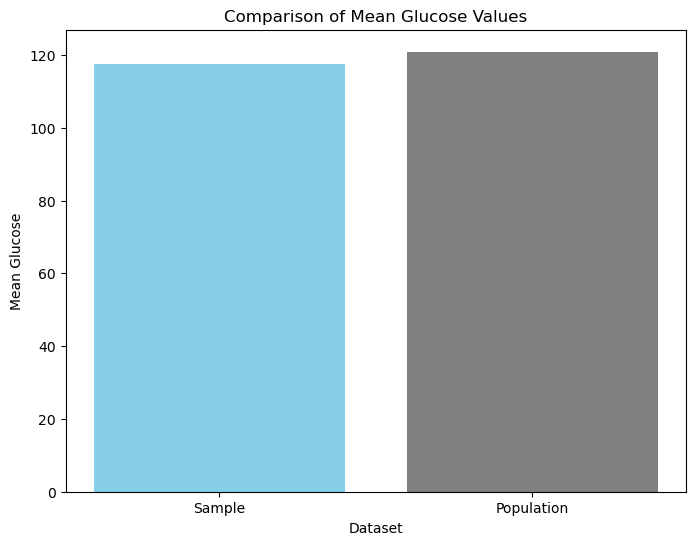

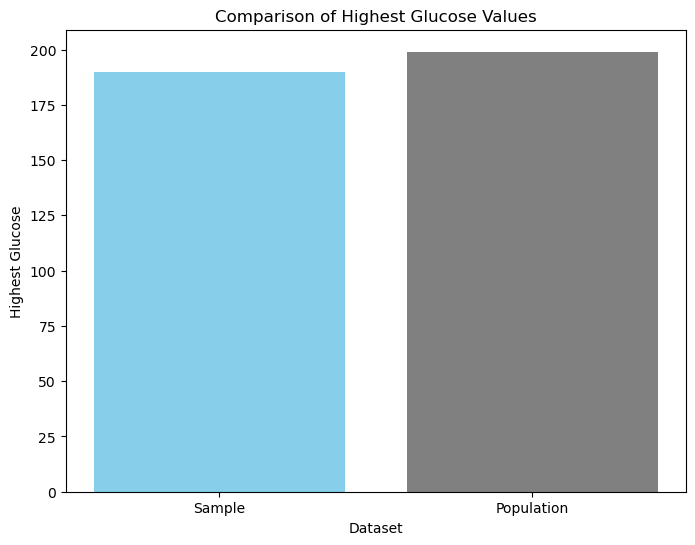

Sample Mean Glucose: 117.52
Sample Highest Glucose: 190
Population Mean Glucose: 120.89453125
Population Highest Glucose: 199


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(442)

# Take a random sample of 25 observations
sample = data.sample(n=25)

# Calculate sample statistics
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Calculate population statistics
population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()

# Create a bar chart to compare mean Glucose values
plt.figure(figsize=(8, 6))
plt.bar(['Sample', 'Population'], [sample_mean_glucose, population_mean_glucose], color=['skyblue', 'gray'])
plt.title('Comparison of Mean Glucose Values')
plt.xlabel('Dataset')
plt.ylabel('Mean Glucose')
plt.show()

# Create a bar chart to compare highest Glucose values
plt.figure(figsize=(8, 6))
plt.bar(['Sample', 'Population'], [sample_max_glucose, population_max_glucose], color=['skyblue', 'gray'])
plt.title('Comparison of Highest Glucose Values')
plt.xlabel('Dataset')
plt.ylabel('Highest Glucose')
plt.show()

print("Sample Mean Glucose:", sample_mean_glucose)
print("Sample Highest Glucose:", sample_max_glucose)
print("Population Mean Glucose:", population_mean_glucose)
print("Population Highest Glucose:", population_max_glucose)


# 2) b)

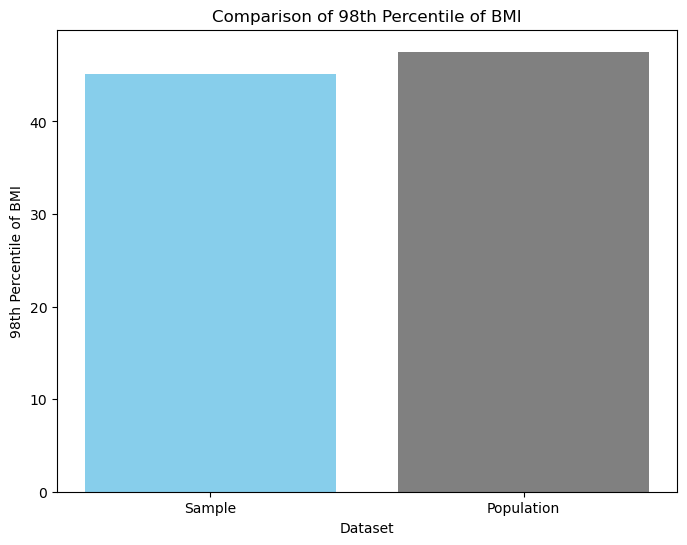

Sample 98th Percentile of BMI: 45.144
Population 98th Percentile of BMI: 47.52599999999996


In [5]:
# Calculate sample and population percentiles
sample_percentile_98 = np.percentile(sample['BMI'], 98)
population_percentile_98 = np.percentile(data['BMI'], 98)

# Create a bar chart to compare 98th percentile of BMI
plt.figure(figsize=(8, 6))
plt.bar(['Sample', 'Population'], [sample_percentile_98, population_percentile_98], color=['skyblue', 'gray'])
plt.title('Comparison of 98th Percentile of BMI')
plt.xlabel('Dataset')
plt.ylabel('98th Percentile of BMI')
plt.show()

print("Sample 98th Percentile of BMI:", sample_percentile_98)
print("Population 98th Percentile of BMI:", population_percentile_98)


# 2) c)

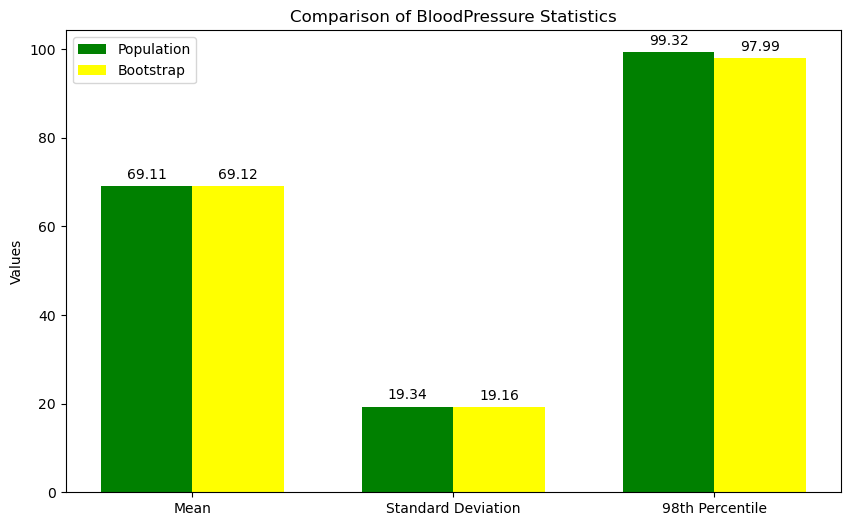

Population Mean: 69.10546875
Population Standard Deviation: 19.343201628981696
Population 98th Percentile: 99.31999999999994

Average Bootstrap Mean: 69.1154
Average Bootstrap Standard Deviation: 19.159684852068725
Average Bootstrap 98th Percentile: 97.98596000000002


In [6]:
# Number of bootstrap samples and sample size
num_bootstrap_samples = 500
sample_size = 150

# Function to calculate statistics for a given variable (BloodPressure)
def calculate_statistics(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    percentile_98 = np.percentile(data, 98)
    return mean, std_dev, percentile_98

# Perform bootstrap sampling and calculate statistics for each sample
bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles = []

for _ in range(num_bootstrap_samples):
    # Sample with replacement
    bootstrap_sample = data['BloodPressure'].sample(n=sample_size, replace=True)
    mean, std_dev, percentile_98 = calculate_statistics(bootstrap_sample)
    bootstrap_means.append(mean)
    bootstrap_std_devs.append(std_dev)
    bootstrap_percentiles.append(percentile_98)

# Calculate average statistics across all bootstrap samples
average_bootstrap_mean = np.mean(bootstrap_means)
average_bootstrap_std_dev = np.mean(bootstrap_std_devs)
average_bootstrap_percentile = np.mean(bootstrap_percentiles)

# Calculate population statistics
population_mean, population_std_dev, population_percentile = calculate_statistics(data['BloodPressure'])

# Create bar charts for comparison
labels = ['Mean', 'Standard Deviation', '98th Percentile']
population_stats = [population_mean, population_std_dev, population_percentile]
bootstrap_stats = [average_bootstrap_mean, average_bootstrap_std_dev, average_bootstrap_percentile]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, population_stats, width, label='Population', color='green')
rects2 = ax.bar(x + width/2, bootstrap_stats, width, label='Bootstrap', color='yellow')

ax.set_ylabel('Values')
ax.set_title('Comparison of BloodPressure Statistics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

# Print the comparison
print("Population Mean:", population_mean,)
print("Population Standard Deviation:", population_std_dev)
print("Population 98th Percentile:", population_percentile)
print()
print("Average Bootstrap Mean:", average_bootstrap_mean)
print("Average Bootstrap Standard Deviation:", average_bootstrap_std_dev)
print("Average Bootstrap 98th Percentile:", average_bootstrap_percentile)


# Report on my findings

After generating 500 bootstrap samples of 150 observations each from the population data for BloodPressure, I calculated the average mean, standard deviation, and percentile for each bootstrap sample. Then, I compared these statistics with the corresponding statistics from the population data.    

By comparing above statistics (Mean, Standarad Deviation and 98th percentile), we can observe how the bootstrap samples reflect the distribution and characteristics of the population data. If the bootstrap samples closely match the population statistics, it indicates that the samples are representative of the population. Conversely, significant deviations may suggest issues with the sampling process or characteristics of the population.